Bitcoin, the pioneering cryptocurrency, has captured the world's attention as a decentralized digital asset with a fluctuating market value. This dataset offers a comprehensive record of Bitcoin's price evolution, spanning from August 2017 to July 2023. The data has been meticulously collected from the Binance API, with price data captured at one-minute intervals. Each record includes essential information such as the open, high, low, and close prices, alongside associated trading volume. This dataset provides an invaluable resource for those interested in studying Bitcoin's price trends and market dynamics.

Dataset Details:
Total Number of Entries: 3.126.000

Attributes: Timestamp, Open Price, High Price, Low Price, Close Price, Volume , Quote asset volume, Number of trades, Taker buy base asset volume, Taker buy quote asset volume.

Data Type: csv

Size: 133 MB

Date ranges: 2023/08/17 till 2023/07/31

Content:
This dataset provides granular insights into the price history of Bitcoin, allowing users to explore minute-by-minute changes in its market value. The dataset includes attributes such as the open price, high price, low price, close price, trading volume, and the timestamp of each recorded interval. The data is presented in CSV format, making it easily accessible for analysis and visualization.

Inspiration:
The Bitcoin Price Dataset opens up numerous avenues for exploration and analysis, driven by the availability of high-frequency data. Potential research directions include:

Intraday Price Patterns: How do Bitcoin prices vary within a single day? Are there recurring patterns or trends during specific hours?
Volatility Analysis: What are the periods of heightened volatility in Bitcoin's price history, and how do they correlate with external events or market developments?
Correlation with Events: Can you identify instances where significant price movements coincide with notable events in the cryptocurrency space or broader financial markets?
Long-Term Trends: How has the average price of Bitcoin evolved over different years? Are there multi-year trends that stand out?
Trading Volume Impact: Is there a relationship between trading volume and price movement? How does trading activity affect short-term price fluctuations?

Acknowledgements:
The dataset has been sourced directly from the Binance API, a prominent cryptocurrency exchange platform. The collaboration with Binance ensures the dataset's accuracy and reliability, offering users a trustworthy foundation for conducting analyses and research related to Bitcoin's price movements.

Licensing:
Users are welcome to utilize this dataset for personal, educational, and research purposes, with attribution to the Binance API as the source of the data.

Hope you enjoy this dataset as much as I enjoyed putting it together. Can't wait to see what you can come up with :)

https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset

In [3]:
#Best Performance:

#Top 1 : Réseaux de Neurone
#R² = 0.948
#MSE: 0.0015513693641693634
#MAE: 0.02682519896301039
#RMSE: 0.039387426473042934

#Top 2 : RNN
#MSE: 645917.6372473708
#MAE: 503.80605277832734
#RMSE: 803.6900131564227
#R²: 0.9046031077875072

#Top 3 : LSTM
#MSE: 2213336.4872645056
#MAE: 1175.3358503792592
#RMSE: 1487.7286336104798
#R²: 0.6731078234597178

#La moyenne de la différence entre le prix d'ouverture et de clôture est de : 0.040631800883827965

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
import mplfinance as mpf
from prophet import Prophet

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

***Data Exploration***

In [ ]:
df = pd.read_csv("bitcoin_2017_to_2023.csv")

In [ ]:
start_date = "2023-01-01"
end_date = "2023-09-30"
df = df.loc[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

In [ ]:
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [ ]:
df.shape

(306400, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306400 entries, 0 to 306399
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   timestamp                     306400 non-null  object 
 1   open                          306400 non-null  float64
 2   high                          306400 non-null  float64
 3   low                           306400 non-null  float64
 4   close                         306400 non-null  float64
 5   volume                        306400 non-null  float64
 6   quote_asset_volume            306400 non-null  float64
 7   number_of_trades              306400 non-null  int64  
 8   taker_buy_base_asset_volume   306400 non-null  float64
 9   taker_buy_quote_asset_volume  306400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 25.7+ MB


In [ ]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,306400.000000,306400.000000,306400.000000,306400.000000,306400.000000,3.064000e+05,306400.000000,306400.000000,3.064000e+05
mean,26085.778956,26093.789506,26077.692078,26085.819627,102.555450,2.440702e+06,2530.488202,50.983983,1.212855e+06
std,3696.796775,3696.531213,3696.950500,3696.759017,169.921743,3.970445e+06,3424.386866,86.268177,2.021264e+06
min,16506.040000,16508.730000,16499.010000,16505.870000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,23218.697500,23227.680000,23209.940000,23218.800000,13.495605,3.824507e+05,406.000000,5.702960,1.616231e+05
50%,27050.480000,27056.510000,27045.000000,27050.475000,40.151145,1.060969e+06,874.000000,19.936240,5.232156e+05
75%,29167.150000,29173.887500,29160.722500,29167.160000,128.934110,2.970932e+06,3772.000000,63.980297,1.476861e+06
max,31798.010000,31804.200000,31723.970000,31798.000000,5877.775450,1.459557e+08,107315.000000,3537.452960,8.791313e+07


In [ ]:
df.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df['price_change'] = df['close'].diff()
df['rolling_mean'] = df['close'].rolling(window=7).mean()
df['rolling_std'] = df['close'].rolling(window=7).std()

In [ ]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'price_change', 'rolling_mean',
       'rolling_std'],
      dtype='object')

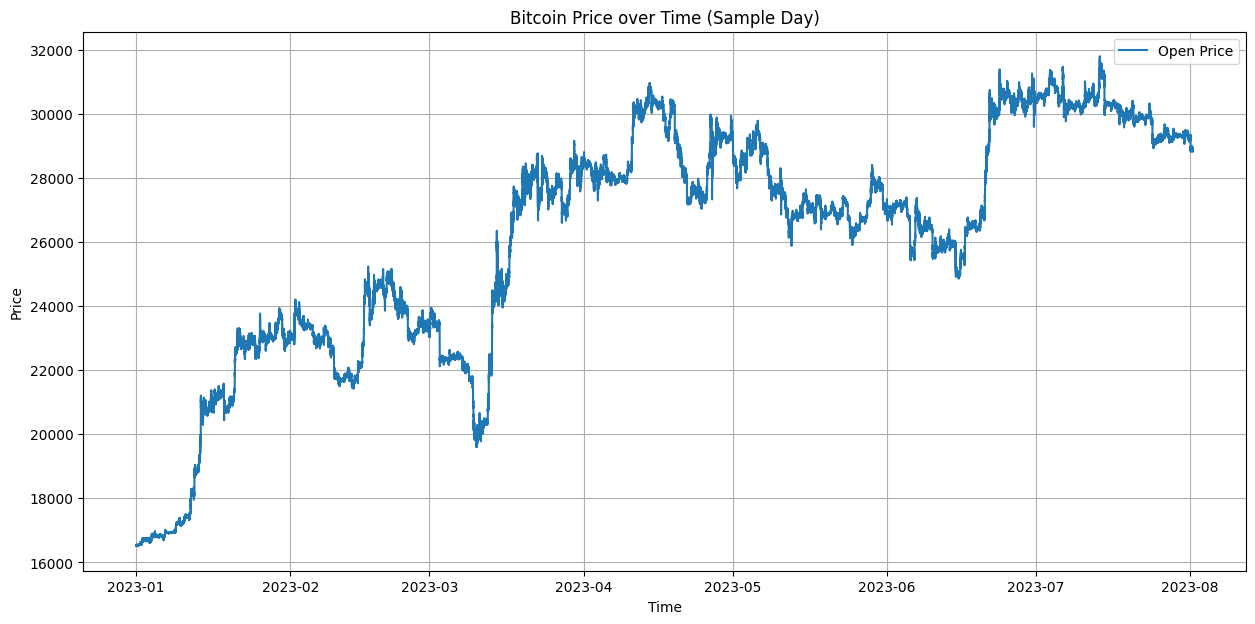

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df['timestamp'], df['open'], label='Open Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bitcoin Price over Time (Sample Day)')
plt.legend()
plt.grid(True)
plt.show()

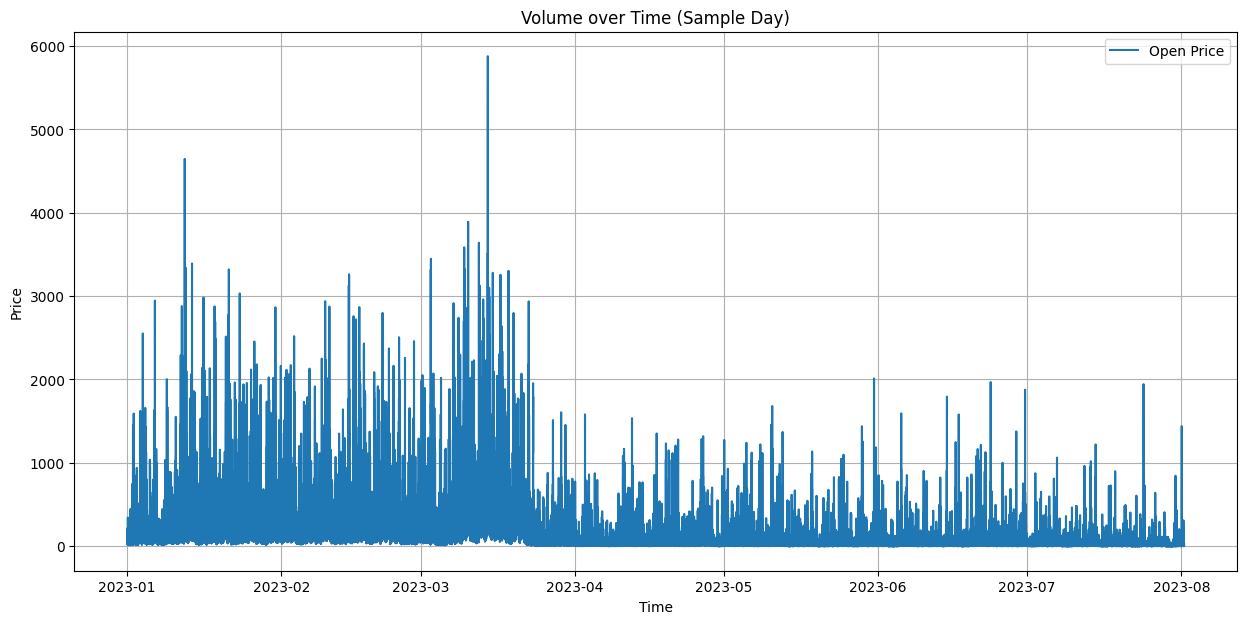

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df['timestamp'], df['volume'], label='Open Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Volume over Time (Sample Day)')
plt.legend()
plt.grid(True)
plt.show()

**Data Cleaning**

In [ ]:
df['price_change'] = df['close'].diff()
df['rolling_mean'] = df['close'].rolling(window=7).mean()
df['rolling_std'] = df['close'].rolling(window=7).std()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['difference'] = df['close'] - df['open']

average_difference = df['difference'].mean()

print(f"La moyenne de la différence entre le prix d'ouverture et de clôture est de : {average_difference}")

La moyenne de la différence entre le prix d'ouverture et de clôture est de : 0.040631800883827965


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df[["open"]] = scaler.fit_transform(df[["open"]])
df[["close"]] = scaler.fit_transform(df[["close"]])

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [ ]:
X_train = train['open'].values.reshape(-1, 1)
y_train = train['close'].values.reshape(-1, 1)
X_test = test['open'].values.reshape(-1, 1)
y_test = test['close'].values.reshape(-1, 1)

**Réseaux de neurone**

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                128       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2241 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
6128/6128 [==============================] - 13s 2ms/step - loss: 0.0025 - val_loss: 4.3616e-06
Epoch 2/10
6128/6128 [==============================] - 14s 2ms/step - loss: 1.9121e-06 - val_loss: 5.5789e-06
Epoch 3/10
6128/6128 [==============================] - 13s 2ms/step - loss: 2.0793e-06 - val_loss: 7.0786e-06
Epoch 4/10
6128/6128 [==============================] - 12s 2ms/step - loss: 2.0462e-06 - val_loss: 5.0093e-06
Epoch 5/10
6128/6128 [==============================] - 12s 2ms/step - loss: 2.0116e-06 - val_loss: 5.9078e-06
Epoch 6/10
6128/6128 [==============================] - 13s 2ms/step - loss: 1.9686e-06 - val_loss: 6.4750e-06
Epoch 7/10
6128/6128 [==============================] - 12s 2ms/step - loss: 1.9750e-06 - val_loss: 7.4760e-06
Epoch 8/10
6128/6128 [==============================] - 12s 2ms/step - loss: 1.9727e-06 - val_loss: 5.1892e-06
Epoch 9/10
6128/6128 [==============================] - 12s 2ms/step - loss: 2.0047e-06 - val_loss: 2.5546e-05
Epoch

In [ ]:
y_pred = model.predict(X_test)

1915/1915 [==============================] - 2s 1ms/step


In [ ]:
import joblib

joblib.dump(model, 'model_bitcoin.pkl')

In [ ]:
y_test_unscaled = scaler_close.inverse_transform(y_test)
y_pred_unscaled = scaler_close.inverse_transform(y_pred)

In [ ]:
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

In [ ]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 449917.9667235086
MAE: 411.21755711453955
RMSE: 670.7592464688867
R²: 0.9335506985706463


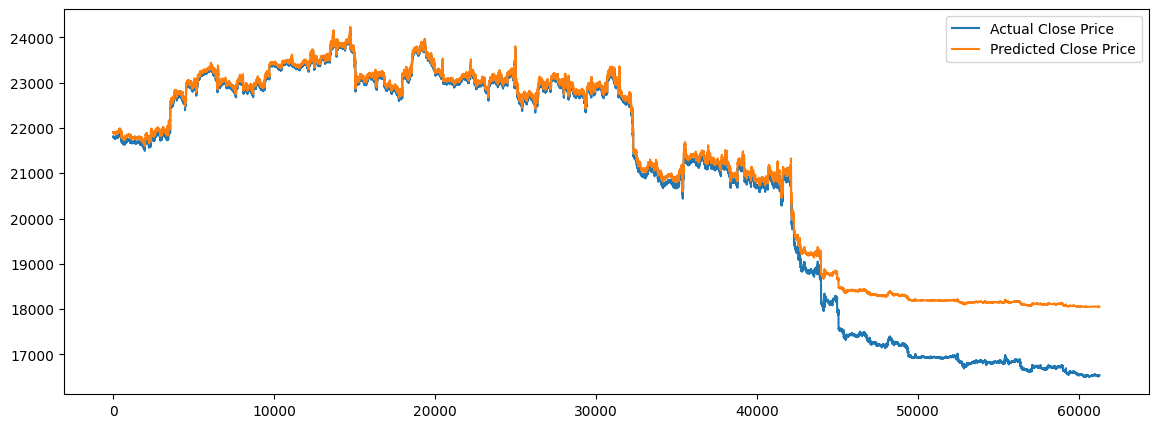

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_unscaled, label='Actual Close Price')
plt.plot(y_pred_unscaled, label='Predicted Close Price')
plt.legend()
plt.show()

**RNN**

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(1, 1), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6337 (24.75 KB)
Trainable params: 6337 (24.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
6128/6128 [==============================] - 16s 2ms/step - loss: 0.0018 - val_loss: 3.6668e-06
Epoch 2/10
6128/6128 [==============================] - 15s 2ms/step - loss: 1.9966e-06 - val_loss: 3.7780e-06
Epoch 3/10
6128/6128 [==============================] - 16s 3ms/step - loss: 2.1765e-06 - val_loss: 5.8917e-06
Epoch 4/10
6128/6128 [==============================] - 16s 3ms/step - loss: 2.2342e-06 - val_loss: 6.8634e-06
Epoch 5/10
6128/6128 [==============================] - 15s 2ms/step - loss: 2.1804e-06 - val_loss: 1.2128e-05
Epoch 6/10
6128/6128 [==============================] - 16s 3ms/step - loss: 2.0982e-06 - val_loss: 1.7845e-05
Epoch 7/10
6128/6128 [==============================] - 16s 3ms/step - loss: 2.0983e-06 - val_loss: 1.7627e-05
Epoch 8/10
6128/6128 [==============================] - 16s 3ms/step - loss: 2.0836e-06 - val_loss: 3.0377e-05
Epoch 9/10
6128/6128 [==============================] - 13s 2ms/step - loss: 2.0425e-06 - val_loss: 3.0350e-05
Epoch

In [ ]:
y_pred = model.predict(X_test)

1915/1915 [==============================] - 3s 2ms/step


In [ ]:
y_test_unscaled = scaler_close.inverse_transform(y_test)
y_pred_unscaled = scaler_close.inverse_transform(y_pred)

In [ ]:
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

In [ ]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 518997.57888927945
MAE: 454.40755788585807
RMSE: 720.4148658164124
R²: 0.923348189866994


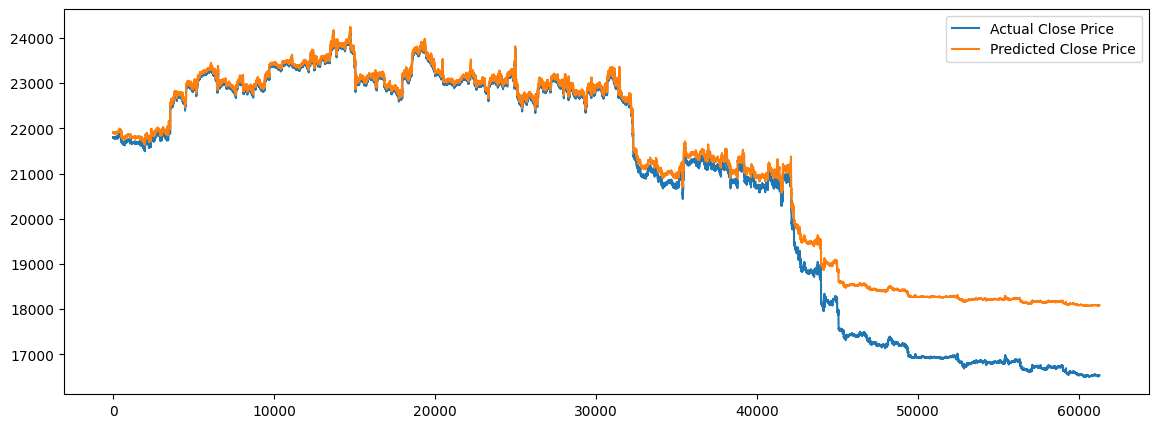

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_unscaled, label='Actual Close Price')
plt.plot(y_pred_unscaled, label='Predicted Close Price')
plt.legend()
plt.show()

**LSTM**

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(10, 1), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19009 (74.25 KB)
Trainable params: 19009 (74.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
6128/6128 [==============================] - 23s 3ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 2/10
6128/6128 [==============================] - 16s 3ms/step - loss: 2.1146e-06 - val_loss: 0.0030
Epoch 3/10
6128/6128 [==============================] - 17s 3ms/step - loss: 2.1721e-06 - val_loss: 0.0029
Epoch 4/10
6128/6128 [==============================] - 18s 3ms/step - loss: 2.1528e-06 - val_loss: 0.0027
Epoch 5/10
6128/6128 [==============================] - 19s 3ms/step - loss: 2.1435e-06 - val_loss: 0.0026
Epoch 6/10
6128/6128 [==============================] - 18s 3ms/step - loss: 2.1323e-06 - val_loss: 0.0025
Epoch 7/10
6128/6128 [==============================] - 18s 3ms/step - loss: 2.1778e-06 - val_loss: 0.0025
Epoch 8/10
6128/6128 [==============================] - 23s 4ms/step - loss: 2.0743e-06 - val_loss: 0.0024
Epoch 9/10
6128/6128 [==============================] - 38s 6ms/step - loss: 2.1125e-06 - val_loss: 0.0023
Epoch 10/10
6128/6128 [==================

In [ ]:
y_pred = model.predict(X_test)

1915/1915 [==============================] - 10s 5ms/step


In [ ]:
y_test_unscaled = scaler_close.inverse_transform(y_test)
y_pred_unscaled = scaler_close.inverse_transform(y_pred)

In [ ]:
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

In [ ]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 3551130.936163571
MAE: 1493.669338512174
RMSE: 1884.4444635392074
R²: 0.4755262349030648


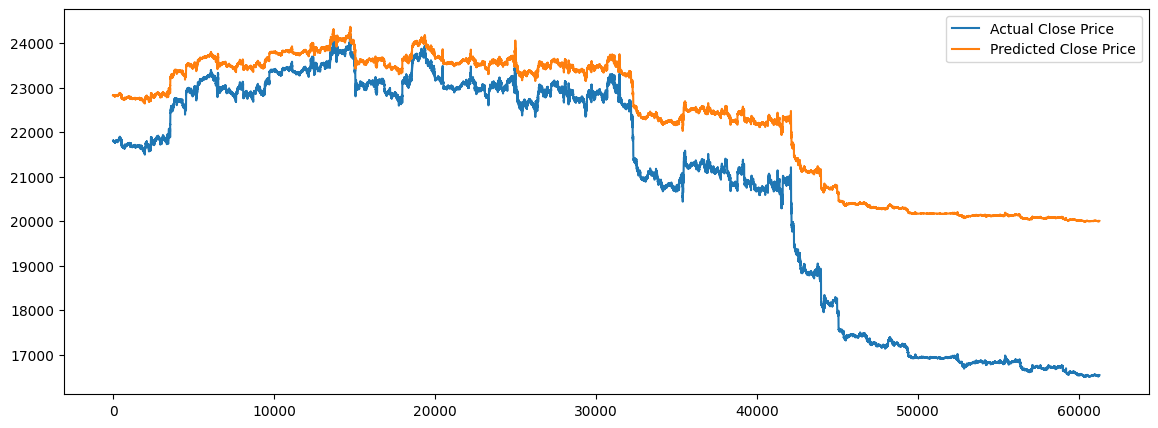

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_unscaled, label='Actual Close Price')
plt.plot(y_pred_unscaled, label='Predicted Close Price')
plt.legend()
plt.show()

**Prophet**